In [ ]:
# Homework 5 / Sofie Ghysels

In [ ]:
# Exercise 1 (p.368, Chap.9)

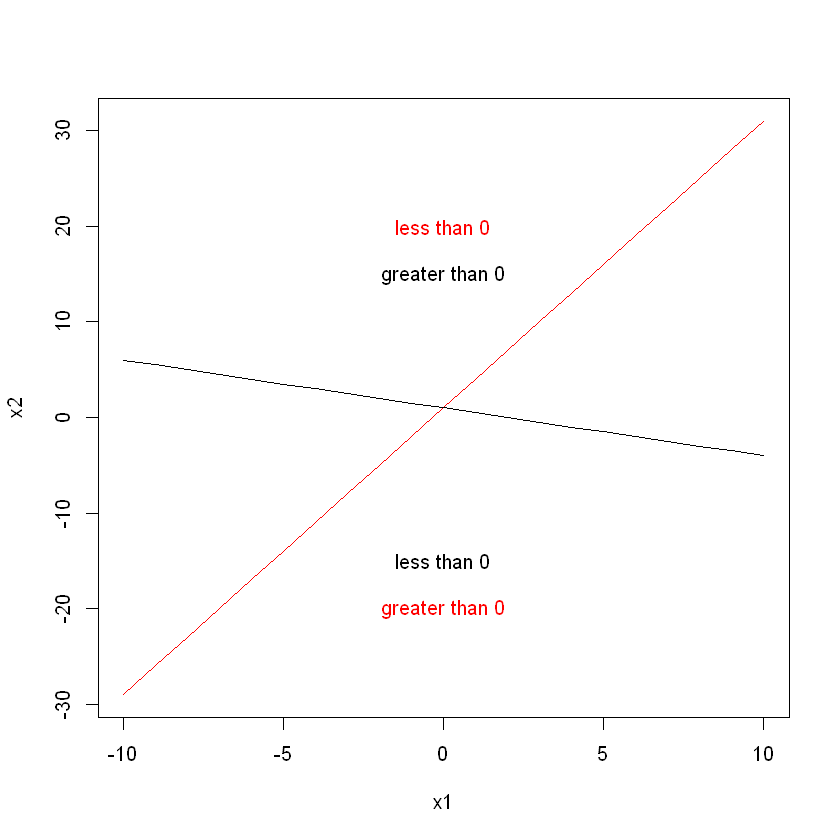

In [1]:
# A + B
x1 = -10:10
x2 = 1 + 3 * x1
plot(x1, x2, type = "l", col = "red")
text(c(0), c(-20), "greater than 0", col = "red")
text(c(0), c(20), "less than 0", col = "red")
lines(x1, 1 - x1/2)
text(c(0), c(-15), "less than 0")
text(c(0), c(15), "greater than 0")

In [ ]:
# Exercise 2 (p.368, Chap.9)

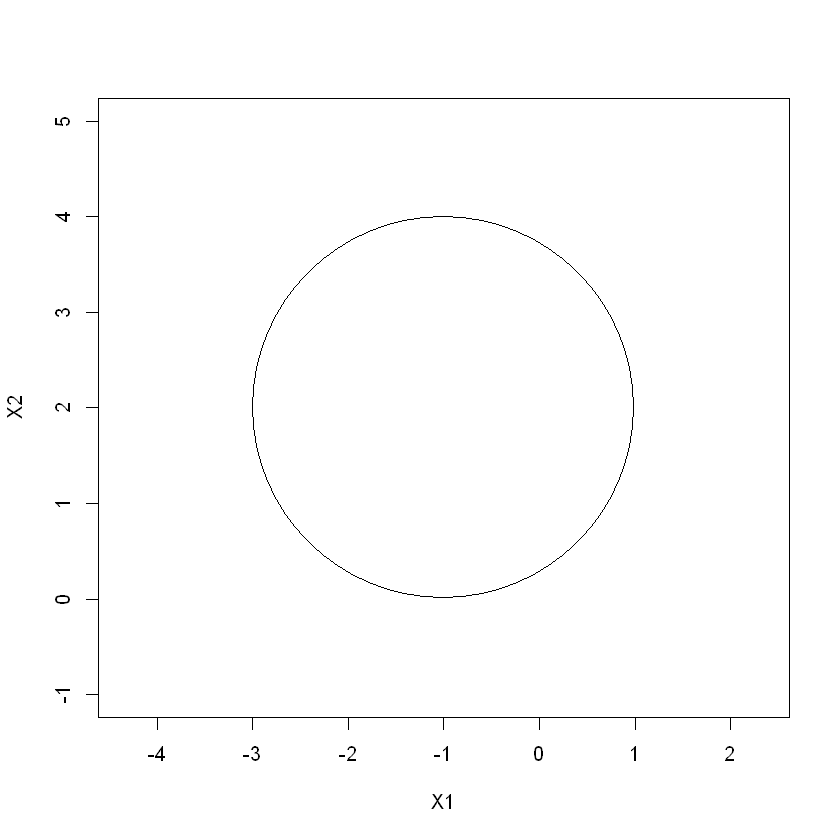

In [4]:
# A
radius = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)

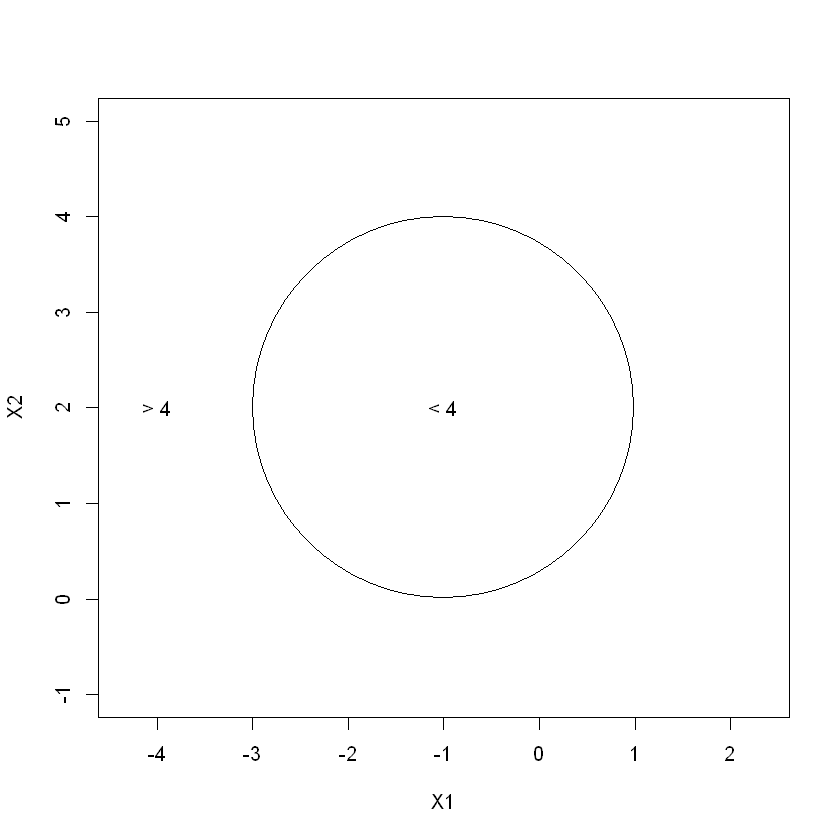

In [5]:
# B
radius = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

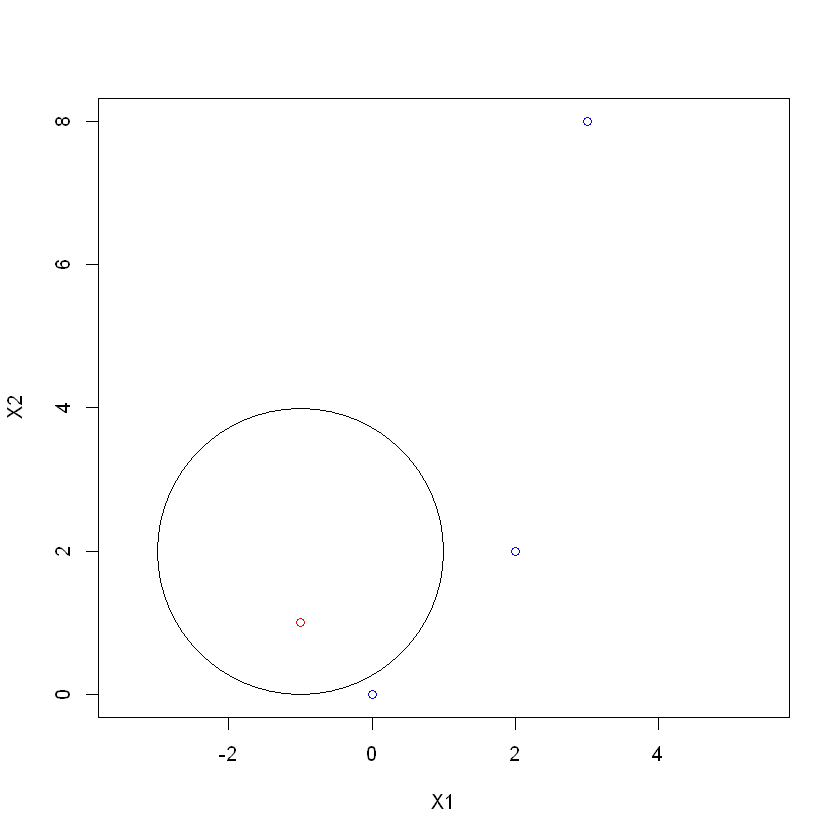

In [7]:
# C
radius = 2
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)

In [ ]:
# D
# Decision boundary is different with the squaring ones

In [ ]:
# Exercise 4 (p.369, Chap.9)

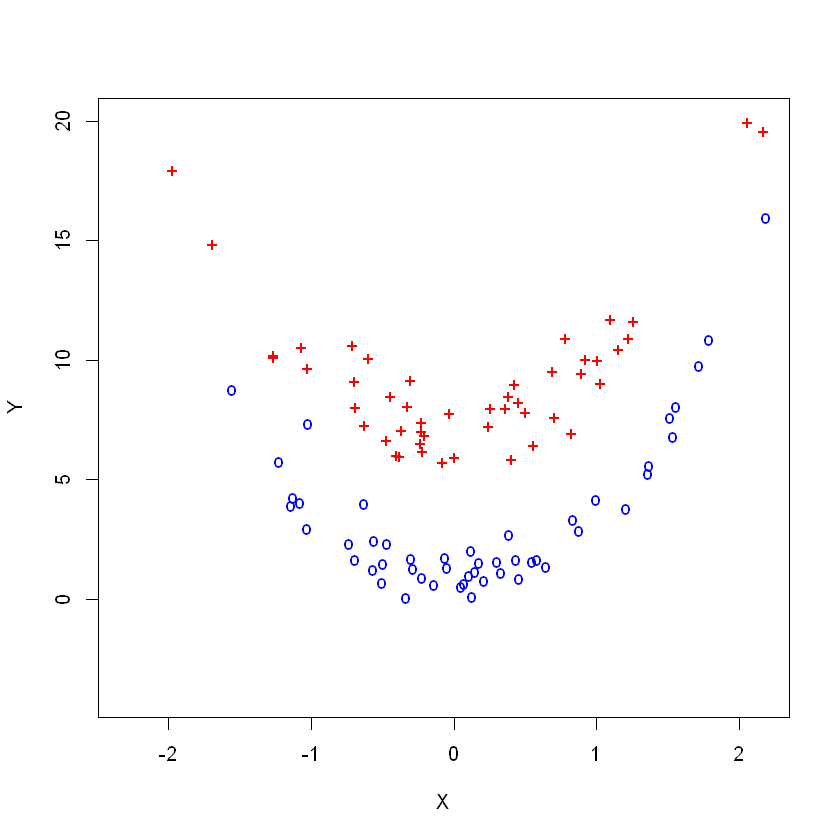

In [12]:
set.seed(123)
x = rnorm(100)
y = 3 * x^2 + 4 + rnorm(100)
train = sample(100, 50)
y[train] = y[train] + 3
y[-train] = y[-train] - 3
plot(x[train], y[train], pch="+", lwd=4, col="red", ylim=c(-4, 20), xlab="X", ylab="Y")
points(x[-train], y[-train], pch="o", lwd=4, col="blue")

In [15]:
set.seed(123)
z = rep(0, 100)
z[train] = 1
# Take 25 observations each from train and -train
final.train = c(sample(train, 25), sample(setdiff(1:100, train), 25))
data.train = data.frame(x=x[final.train], y=y[final.train], z=as.factor(z[final.train]))
data.test = data.frame(x=x[-final.train], y=y[-final.train], z=as.factor(z[-final.train]))
library(e1071)

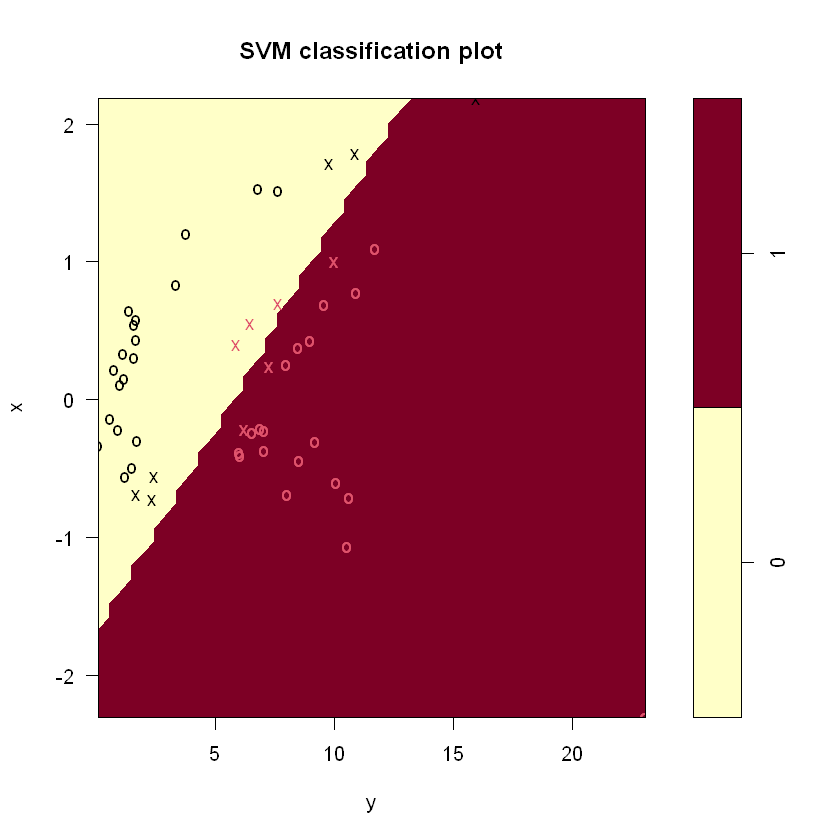

In [16]:
svm.linear = svm(z~., data=data.train, kernel="linear", cost=10)
plot(svm.linear, data.train)

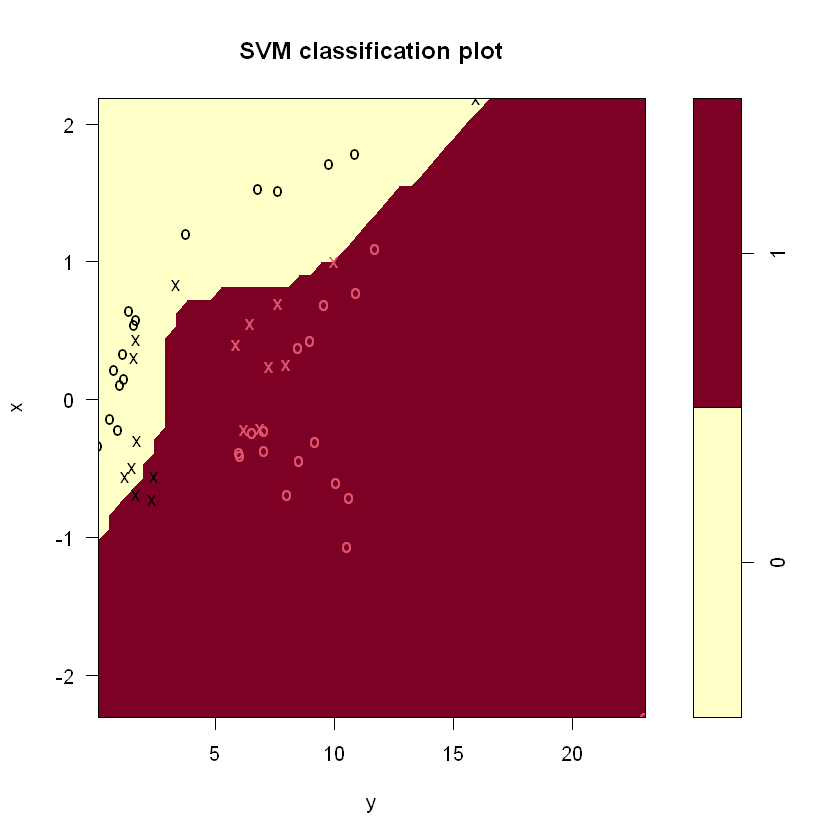

In [20]:
set.seed(285)
svm.poly = svm(z~., data=data.train, kernel="polynomial", cost=10)
plot(svm.poly, data.train)

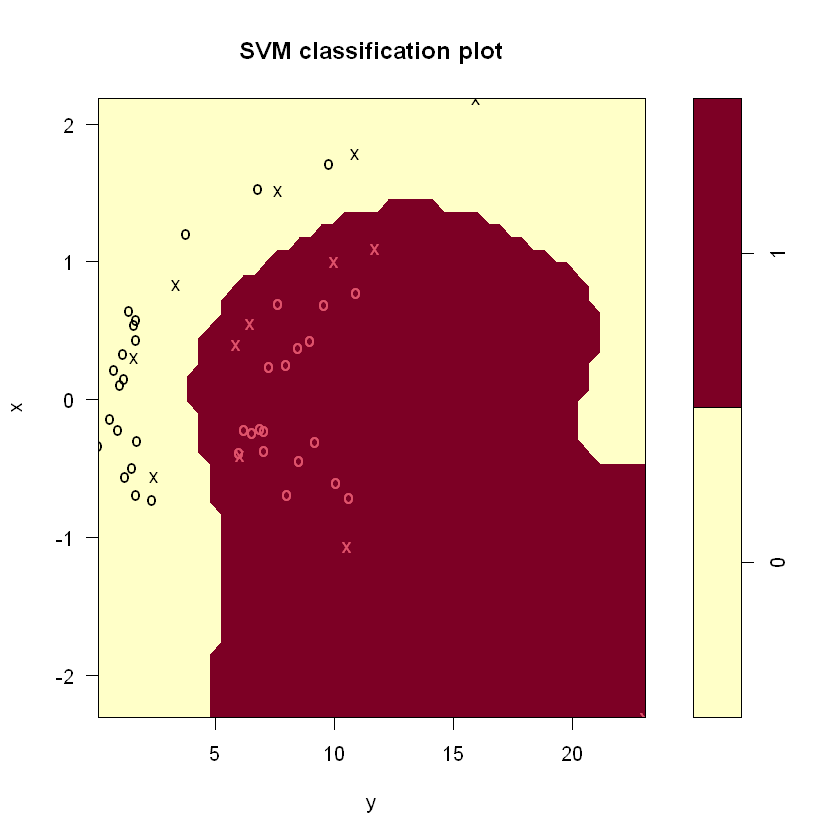

In [21]:
set.seed(111)
svm.radial = svm(z~., data=data.train, kernel="radial", gamma=1, cost=10)
plot(svm.radial, data.train)

In [ ]:
# Exercise 7 (p.371, Chap.9)

In [24]:
# A
library(ISLR)
Auto$binary = ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$binary <- as.factor(Auto$binary)

In [26]:
# B
set.seed(123)
library(e1071)
svm.linear <- tune(e1071::svm, binary ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(svm.linear)


Parameter tuning of 'e1071::svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07634615 0.03928191
2 1e-01 0.04333333 0.03191738
3 1e+00 0.01025641 0.01792836
4 5e+00 0.01538462 0.01792836
5 1e+01 0.01788462 0.01727588
6 1e+02 0.03320513 0.02720447
7 1e+03 0.03320513 0.02720447


In [27]:
# C
set.seed(21)
svm.radial <- tune(e1071::svm, binary ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(svm.radial)


Parameter tuning of 'e1071::svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100  0.01

- best performance: 0.01282051 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.55878205 0.04538579
2  1e-01 1e-02 0.08942308 0.03679590
3  1e+00 1e-02 0.07666667 0.03176108
4  5e+00 1e-02 0.04596154 0.03567807
5  1e+01 1e-02 0.02551282 0.02076457
6  1e+02 1e-02 0.01282051 0.01813094
7  1e-02 1e-01 0.20403846 0.07617157
8  1e-01 1e-01 0.07666667 0.03606898
9  1e+00 1e-01 0.05621795 0.03138634
10 5e+00 1e-01 0.02807692 0.02537217
11 1e+01 1e-01 0.02557692 0.01709522
12 1e+02 1e-01 0.03070513 0.01624058
13 1e-02 1e+00 0.55878205 0.04538579
14 1e-01 1e+00 0.55878205 0.04538579
15 1e+00 1e+00 0.06128205 0.02971730
16 5e+00 1e+00 0.05608974 0.02874269
17 1e+01 1e+00 0.05608974 0.02874269
18 1e+02 1e+00 0.05608974 0.02874269
19 1e-02 5e+00 0.55878205 0.04538579
20 1e-01 5e+00 0.55878205 0.04538579
21 1e+00 5e+00 0.50782051 0.0694

In [28]:
# Polynomial 
set.seed(21)
svm.poly<- tune(e1071::svm, binary ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(svm.poly, Auto, )


Parameter tuning of 'e1071::svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     1

- best performance: 0.03320513 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.55878205 0.04538579
2  1e-01 1e-02 0.55878205 0.04538579
3  1e+00 1e-02 0.54608974 0.05448714
4  5e+00 1e-02 0.30096154 0.08498003
5  1e+01 1e-02 0.27557692 0.08374348
6  1e+02 1e-02 0.23224359 0.10013508
7  1e-02 1e-01 0.27557692 0.08374348
8  1e-01 1e-01 0.23224359 0.10013508
9  1e+00 1e-01 0.07634615 0.05548027
10 5e+00 1e-01 0.06108974 0.04635132
11 1e+01 1e-01 0.04589744 0.03932460
12 1e+02 1e-01 0.04096154 0.03669302
13 1e-02 1e+00 0.04589744 0.03932460
14 1e-01 1e+00 0.04096154 0.03669302
15 1e+00 1e+00 0.03320513 0.02437172
16 5e+00 1e+00 0.03320513 0.02437172
17 1e+01 1e+00 0.03320513 0.02437172
18 1e+02 1e+00 0.03320513 0.02437172
19 1e-02 5e+00 0.03320513 0.02437172
20 1e-01 5e+00 0.03320513 0.02437172
21 1e+00 5e+00 0.03320513 0.0243

In [29]:
svm.linear <- svm(binary ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(binary ~ ., data = Auto, kernel = "polynomial", cost = 1, degree = 1)
svm.radial <- svm(binary ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)

In [ ]:
# D

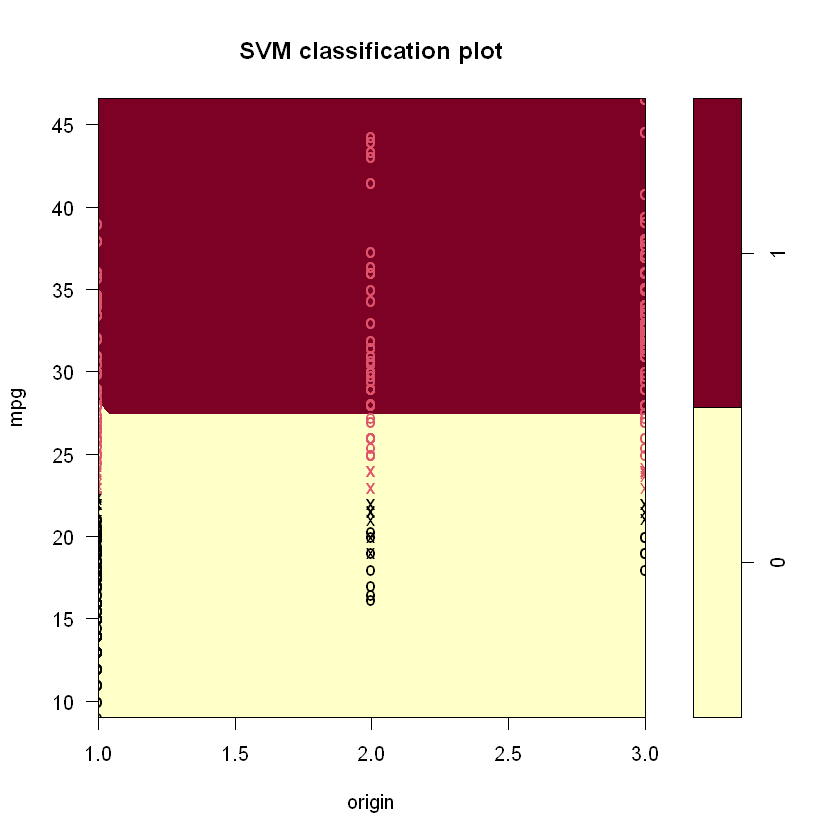

In [30]:
plot(svm.linear, Auto,mpg~origin)

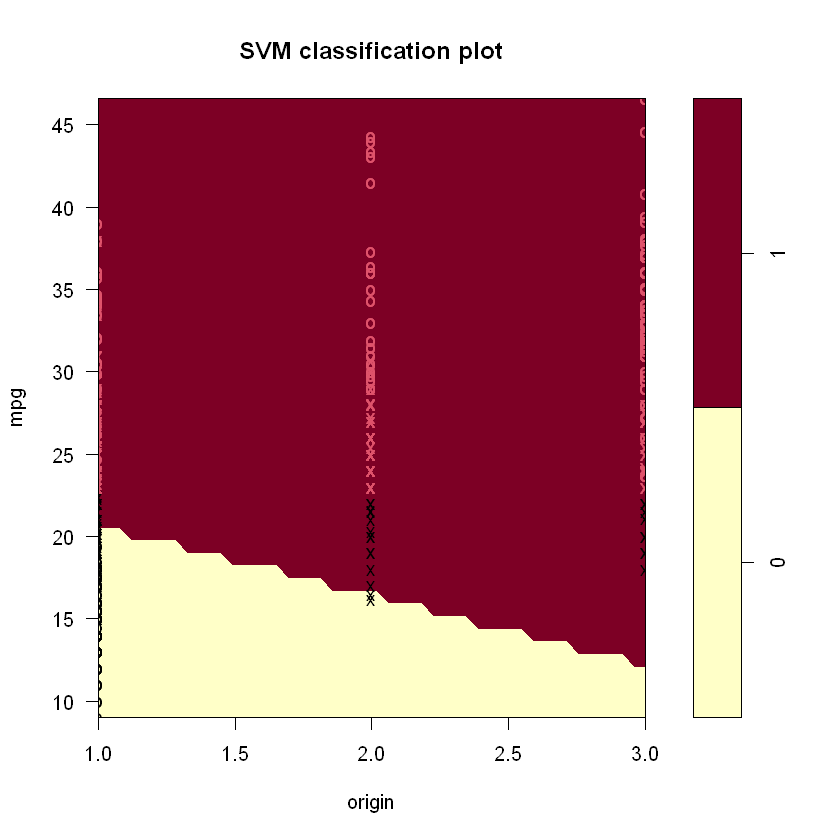

In [31]:
plot(svm.poly, Auto,mpg~origin)

In [ ]:
# Exercise 8 (p.371)

In [35]:
# A
library(ISLR)
set.seed(9004)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

In [37]:
# B
library(e1071)
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 222 220 )


Number of Classes:  2 

Levels: 
 CH MM




In [39]:
# C
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)
(82 + 53)/(439 + 53 + 82 + 226)
# Training error rate = 16,88%

    train.pred
      CH  MM
  CH 432  51
  MM  80 237

[1] 0.16875

In [41]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)
(19 + 29)/(142 + 19 + 29 + 80)
# Test error rate = 17,78%

    test.pred
      CH  MM
  CH 146  24
  MM  22  78

[1] 0.1777778

In [42]:
# D
set.seed(1554)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.1625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.16750 0.03395258
2   0.01778279 0.16875 0.02960973
3   0.03162278 0.16625 0.02638523
4   0.05623413 0.16875 0.03076005
5   0.10000000 0.16875 0.02901748
6   0.17782794 0.16750 0.02838231
7   0.31622777 0.17000 0.02898755
8   0.56234133 0.16875 0.02841288
9   1.00000000 0.16500 0.03106892
10  1.77827941 0.16500 0.03106892
11  3.16227766 0.16250 0.03118048
12  5.62341325 0.16375 0.02664713
13 10.00000000 0.16750 0.02581989


In [44]:
# E
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)
(57 + 71)/(435 + 57 + 71 + 237)
# Training error is now 16%

    train.pred
      CH  MM
  CH 428  55
  MM  74 243

[1] 0.16

In [47]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)
(29 + 20)/(141 + 20 + 29 + 80)
# Test error is now 18,15% 

    test.pred
      CH  MM
  CH 146  24
  MM  20  80

[1] 0.1814815

In [48]:
# F
set.seed(410)
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  371

 ( 188 183 )


Number of Classes:  2 

Levels: 
 CH MM




In [51]:
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)
(40 + 78)/(452 + 40 + 78 + 230)
# Training error rate is 14,75% 

    train.pred
      CH  MM
  CH 441  42
  MM  74 243

[1] 0.1475

In [53]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)
(27 + 15)/(146 + 15 + 27 + 82)
# Test error rate is 15,55% 

    test.pred
      CH  MM
  CH 148  22
  MM  27  73

[1] 0.1555556

In [54]:
# Tuning 
set.seed(755)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.3162278

- best performance: 0.1675 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39625 0.06615691
2   0.01778279 0.39625 0.06615691
3   0.03162278 0.35375 0.09754807
4   0.05623413 0.20000 0.04249183
5   0.10000000 0.17750 0.04073969
6   0.17782794 0.17125 0.03120831
7   0.31622777 0.16750 0.04216370
8   0.56234133 0.16750 0.03782269
9   1.00000000 0.17250 0.03670453
10  1.77827941 0.17750 0.03374743
11  3.16227766 0.18000 0.04005205
12  5.62341325 0.18000 0.03446012
13 10.00000000 0.18625 0.04427267


In [56]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameters$cost)
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)
(77 + 40)/(452 + 40 + 77 + 231)
# Train error rate is now 14,63%

    train.pred
      CH  MM
  CH 440  43
  MM  81 236

[1] 0.14625

In [58]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)
(28 + 15)/(146 + 15 + 28 + 81)
# Test error rate 15,93%

    test.pred
      CH  MM
  CH 145  25
  MM  28  72

[1] 0.1592593

In [60]:
# G
set.seed(8112)
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  456

 ( 232 224 )


Number of Classes:  2 

Levels: 
 CH MM




In [62]:
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)
(32 + 105)/(460 + 32 + 105 + 203)
# Train error rate is 17,13%

    train.pred
      CH  MM
  CH 450  33
  MM 111 206

[1] 0.17125

In [64]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)
(12 + 37)/(149 + 12 + 37 + 72)
# Test error rate is 18,15%

    test.pred
      CH  MM
  CH 149  21
  MM  34  66

[1] 0.1814815

In [66]:
set.seed(322)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, 
    ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.18 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39250 0.05749396
2   0.01778279 0.37500 0.05863020
3   0.03162278 0.36375 0.05756940
4   0.05623413 0.33875 0.06626179
5   0.10000000 0.30375 0.05172376
6   0.17782794 0.24000 0.04440971
7   0.31622777 0.21000 0.04362084
8   0.56234133 0.20250 0.03987829
9   1.00000000 0.20375 0.03634805
10  1.77827941 0.19500 0.04866267
11  3.16227766 0.18750 0.04409586
12  5.62341325 0.18875 0.04185375
13 10.00000000 0.18000 0.03593976


In [69]:
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)
(37 + 84)/(455 + 37 + 84 + 224)
# Train error rate is 15,13%

    train.pred
      CH  MM
  CH 447  36
  MM  85 232

[1] 0.15125

In [71]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)
(13 + 34)/(148 + 13 + 34 + 75)
# Test error rate is 17,41%

    test.pred
      CH  MM
  CH 148  22
  MM  28  72

[1] 0.1740741

In [ ]:
# H
# radial basis kernel has the best error rates